In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [4]:
# Description for each feature

info = ["age","1: male, 0: female","chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 0 = normal; 1 = fixed defect; 2 = reversable defect" , "condition : 0 = no disease, 1 = disease"]
for i in range(len(info)):
    print(df.columns[i]+":\t\t"+info[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
trestbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
condition:		condition : 0 = no disease, 1 = disease


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
# The first five data entries
df[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# Data pre-processing

In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [8]:
# Uses to remove row with null value

# df.dropna(axis = 0, inplace = True)
# print(df.shape)

In [9]:
print("% of each class in the original dataset  -")
print(df.condition.value_counts() / len(df))

print("As we can see from the above result the two original dataset has balanced number class/label")

% of each class in the original dataset  -
0    0.538721
1    0.461279
Name: condition, dtype: float64
As we can see from the above result the two original dataset has balanced number class/label


# Data Visualization

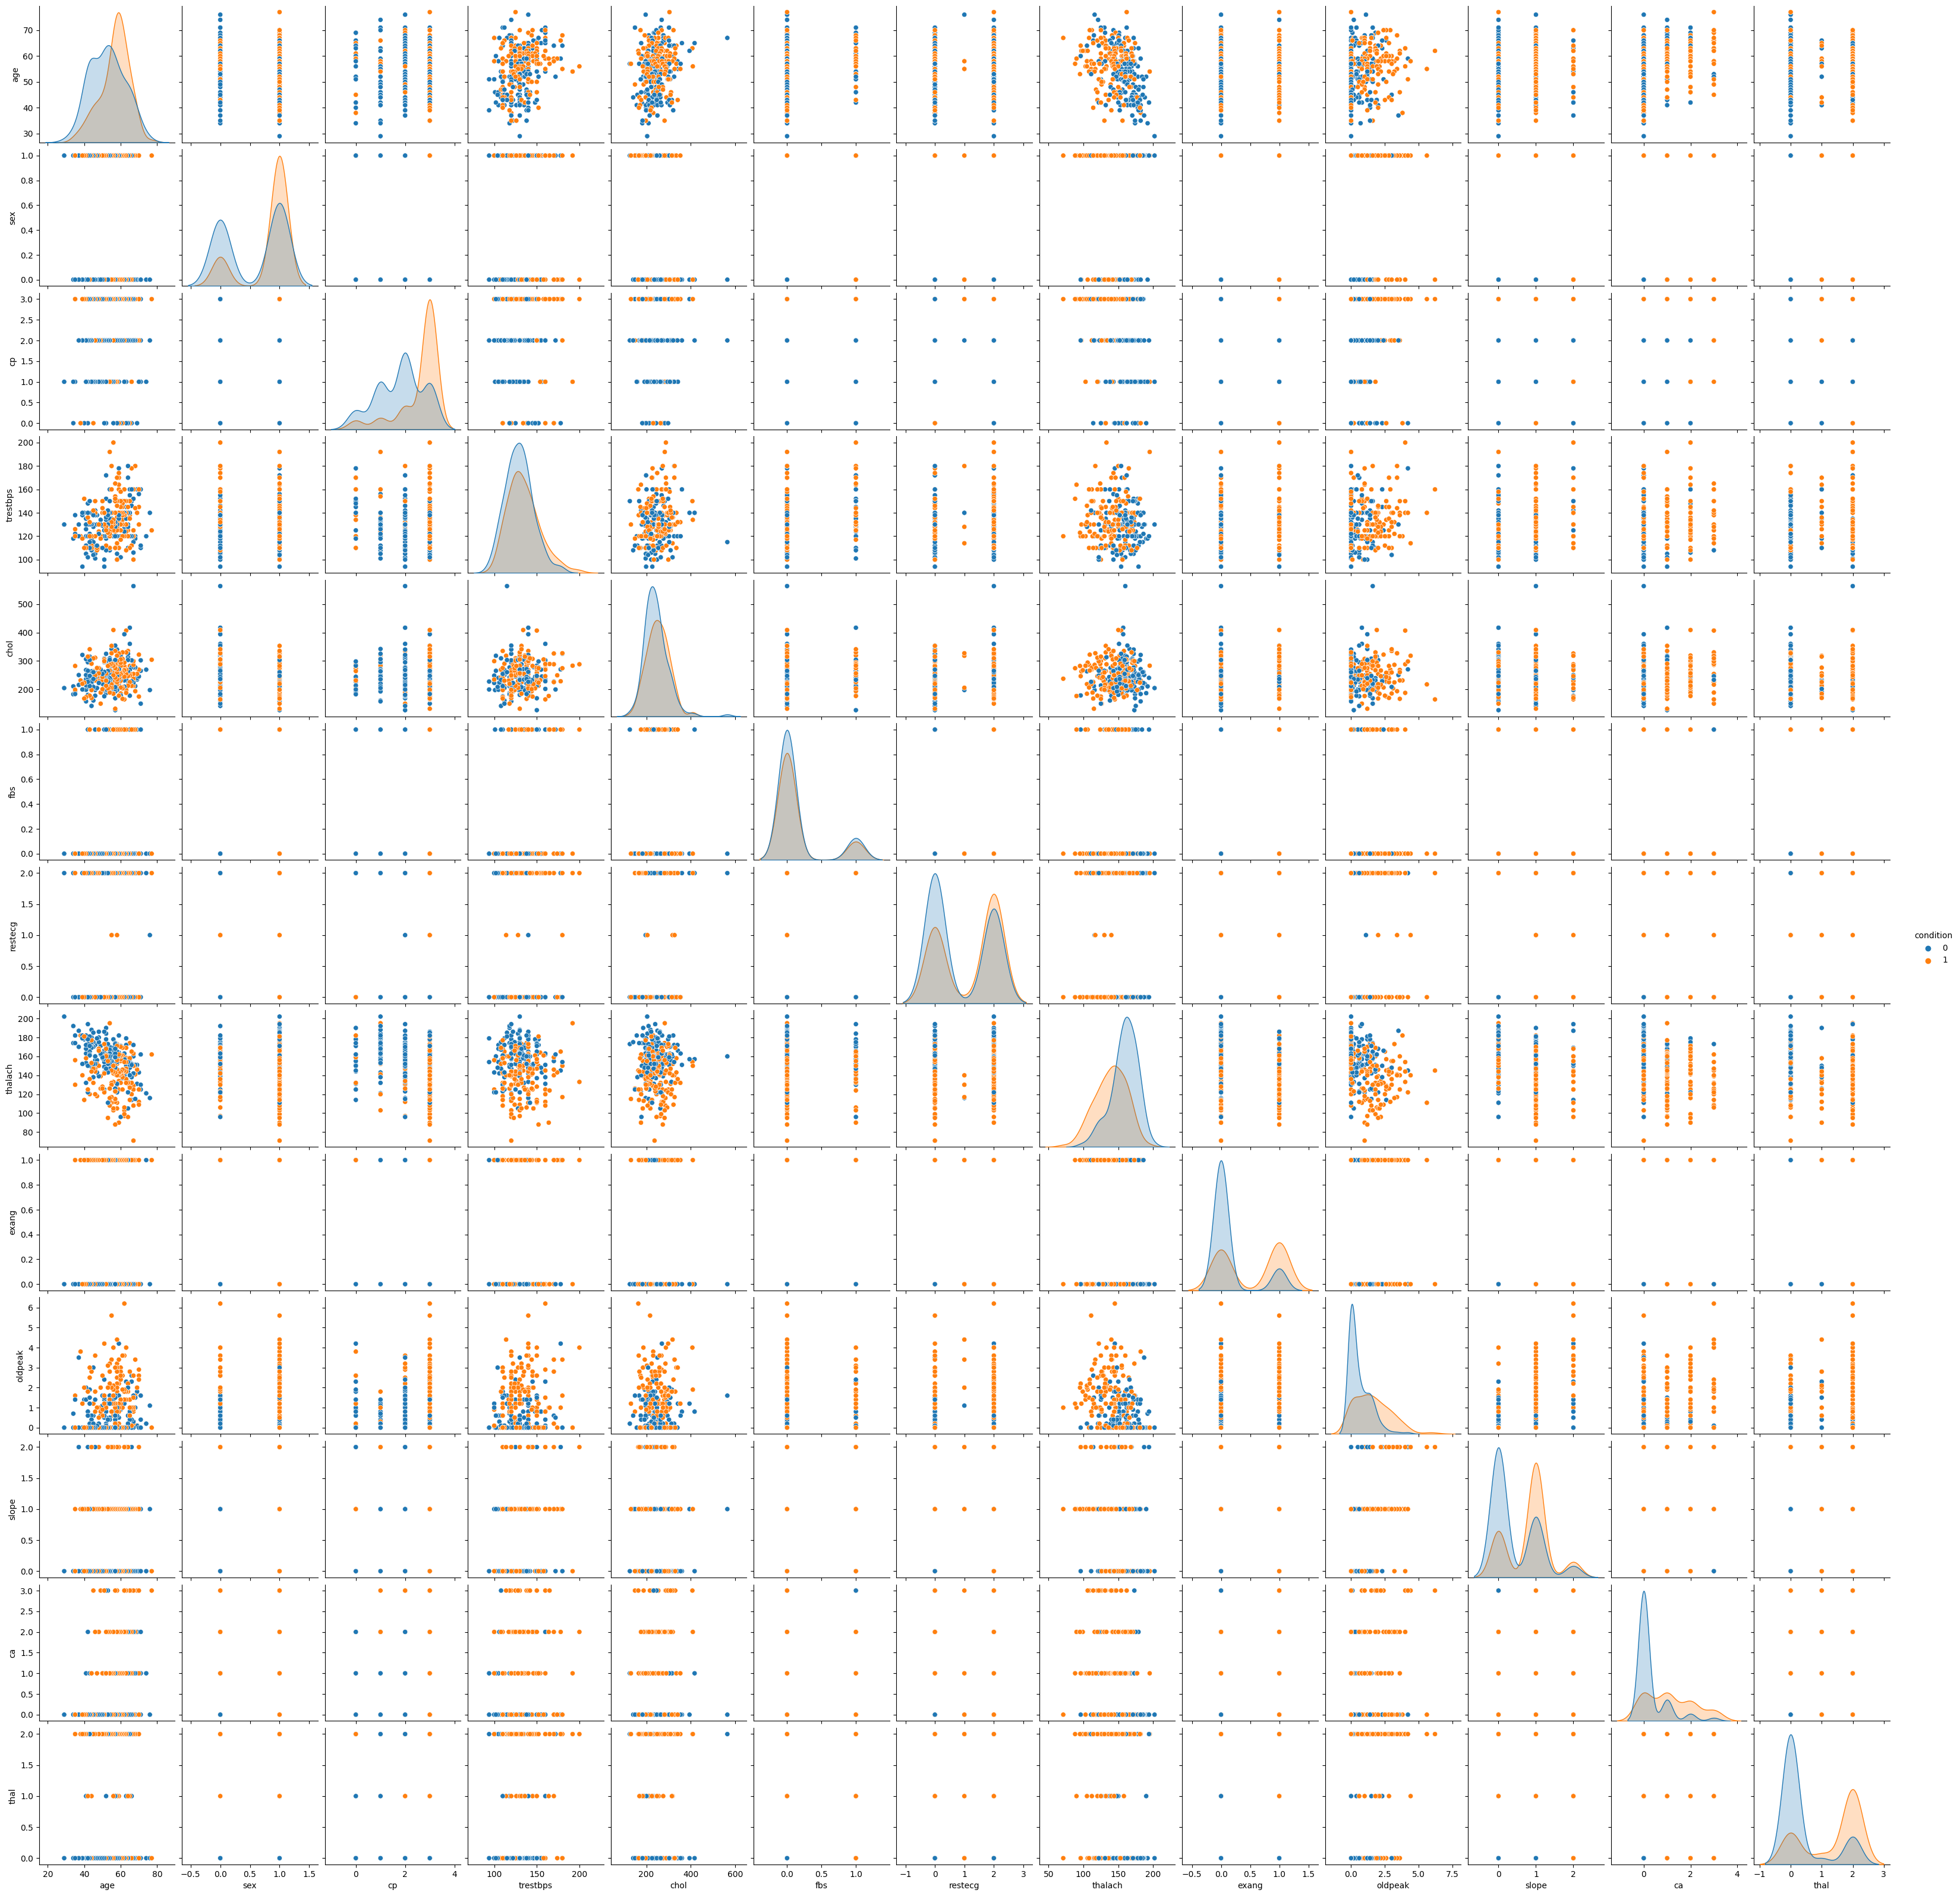

In [10]:
sns.pairplot(df,hue="condition")

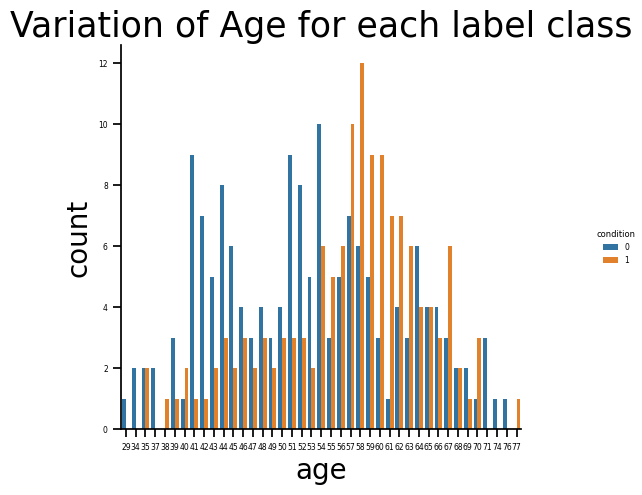

In [11]:
sns.set_context("notebook", font_scale = 0.5, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'condition', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each label class')
plt.show()

In [12]:
df['sex'] = df.sex.map({0: 'female', 1: 'male'})

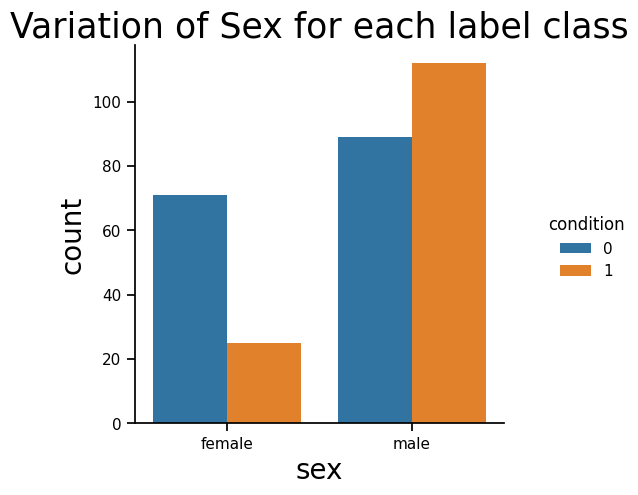

In [13]:
sns.set_context("notebook", font_scale = 1, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'sex', hue = 'condition', order = df['sex'].sort_values().unique())
plt.title('Variation of Sex for each label class')
plt.show()

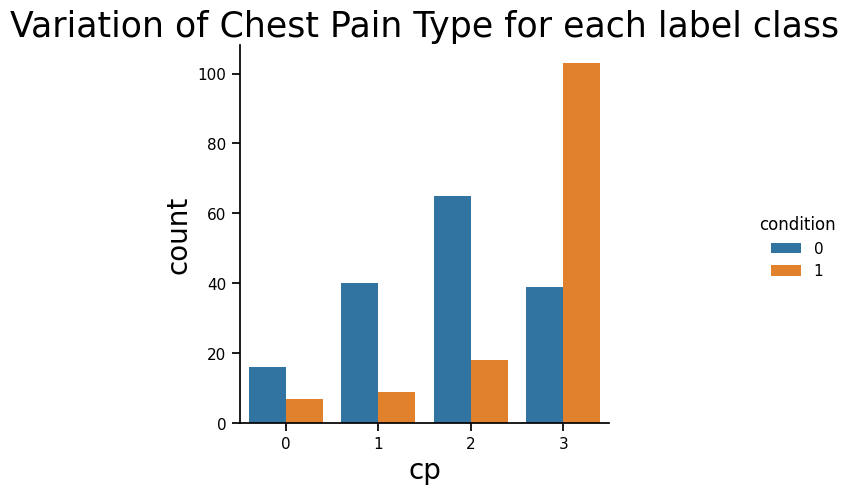

In [14]:
sns.set_context("notebook", font_scale = 1, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'cp', hue = 'condition', order = df['cp'].sort_values().unique())
plt.title('Variation of Chest Pain Type for each label class')
plt.show()

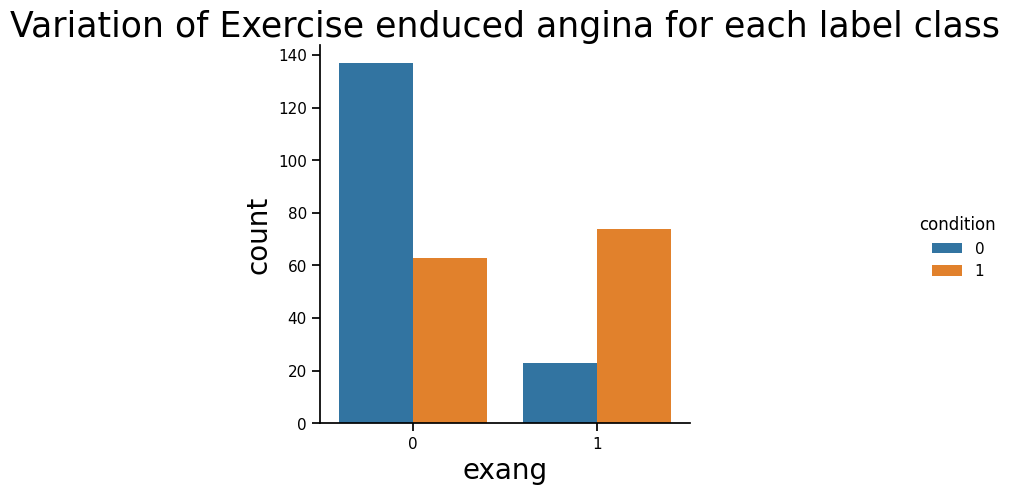

In [15]:
sns.set_context("notebook", font_scale = 1, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'exang', hue = 'condition', order = df['exang'].sort_values().unique())
plt.title('Variation of Exercise enduced angina for each label class')
plt.show()

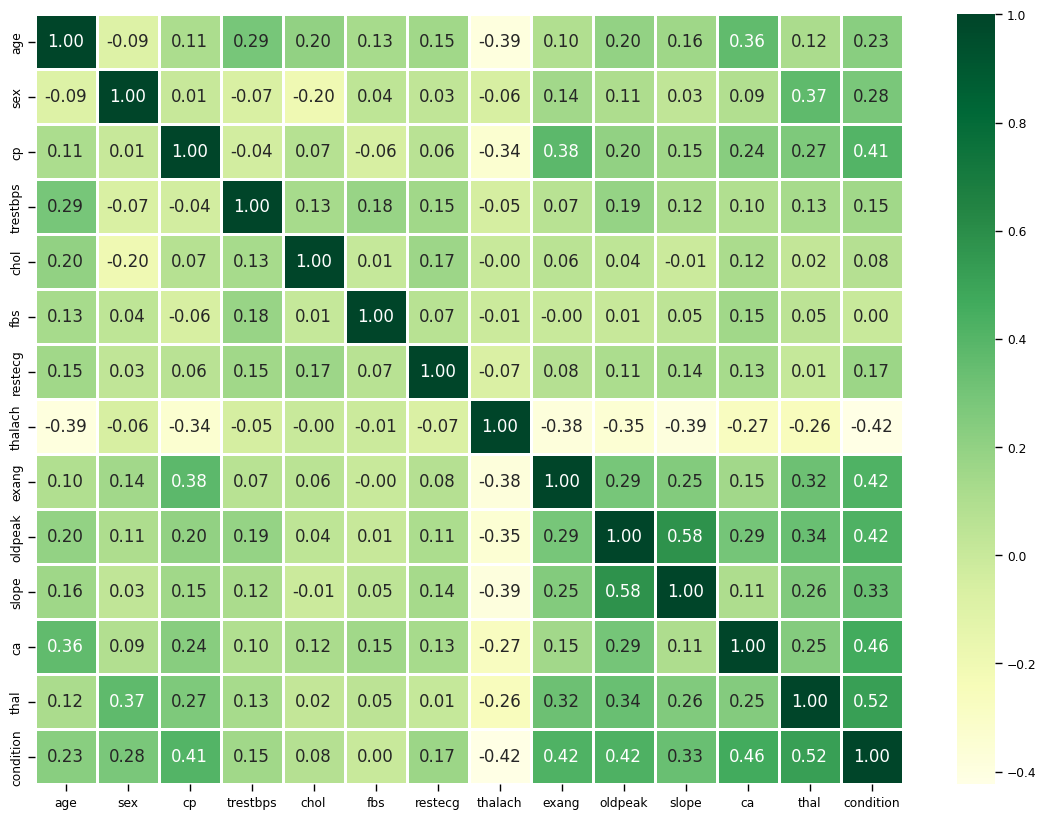

In [20]:
plt.figure(figsize = (14, 10))
sns.set_context("paper", font_scale = 1, rc = {"font.size": 12,"axes.titlesize": 20,"axes.labelsize": 18}) 
sns.heatmap(df.corr(), cmap='YlGn',annot=True, fmt=".2f", linewidths=1.0)
plt.show()

In [17]:
df['sex'] = df.sex.map({'female':0, 'male': 1})

# Data Modeling Using Logistic Regression

In [21]:
# Split feature and label

data = df.iloc[:, :-1].values
label = df.iloc[:, -1].values

In [22]:
# Create Logistic model
LogisticRegressionModel = LogisticRegression(max_iter=1000)

# Split the data into Training data and Test data
training_data, test_data, training_label, test_label = train_test_split(data, label, random_state=0, test_size = 0.3)

# Training the model using the training data
LogisticRegressionModel.fit(training_data, training_label)

LogisticRegression(max_iter=1000)

In [23]:
# Predict the label of the test data
predicted_label = LogisticRegressionModel.predict(test_data)

In [24]:
# Calculate the confusion matrix of the trained model
test_confusion_matrics = confusion_matrix(predicted_label, test_label)
print(test_confusion_matrics)

[[33  8]
 [ 5 44]]


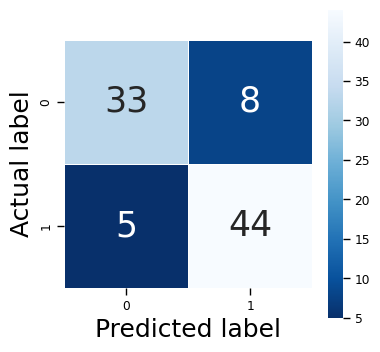

In [25]:
#  Confusion matric using seaborn
plt.figure(figsize=(4,4))
sns.set_context("paper", font_scale = 1, rc = {"font.size": 25,"axes.titlesize": 20,"axes.labelsize": 18}) 
sns.heatmap(test_confusion_matrics, annot=True,fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [26]:
# Use score method to calculate Accuracy for test set
score = LogisticRegressionModel.score(test_data, test_label)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.8555555555555555
